<a href="https://colab.research.google.com/github/gabrieleite/Projeto_Integrador_2022/blob/main/C%C3%B3pia_de_Projeto_Integrador_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Pandas** 

A biblioteca Pandas é uma biblioteca Python para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis ​​pelo usuário. A biblioteca oferece várias maneiras de remodelar e reestruturar os DataFrames. Esses métodos variam de simples e fáceis até poderosos e complexos. (**VOITTO**, 2022)

**Matplotlib**

Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. O Matplotlib torna as coisas mais fáceis e as difíceis possíveis. (**Matplotlib**, 2022)

**Seaborn**

Seaborn é uma biblioteca que usa o Matplotlib para plotar gráficos. Ele será usado para visualizar distribuições aleatórias. (**W3schools**, 2022)

In [2]:
def emcima(rects, ax):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height), 
                xytext = (0, 3),
                textcoords="offset points",
                ha = 'center', va='bottom')

#Importação dos Dados 

In [4]:
#Importação dos dados
dados = pd.read_csv('/content/ocorrencias_cenipa.csv')

In [ ]:
#Visualização do conjunto de dados
dados.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


#Dados por Região

In [ ]:
regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
           'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
           'Centro Oeste': ['MT', 'MS', 'GO'],
           'Sudeste': ['SP', 'RJ', 'ES', 'MG'], 
           'Sul': ['PR', 'RS', 'SC']}

tipos = ['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']

um = {i: [len([k for k in list(dados.loc[dados['tipo'] == i, ['estado']]['estado'])
              if k in regioes[j]]) for j in regioes.keys()] for i in tipos}

um['Região'] = list(regioes.keys())
dados_por_regiao = pd.DataFrame(um)

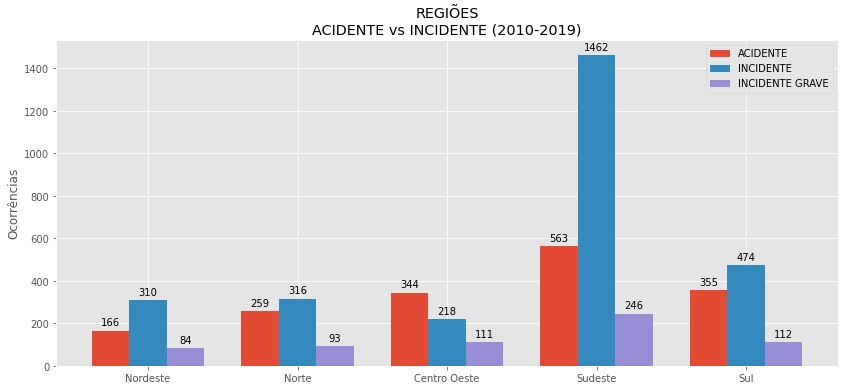

In [ ]:
#Visualizando os dados no gráfico
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1 ]
r3 = [ x + width for x in r2 ]

rects1 = ax.bar(r1, dados_por_regiao['ACIDENTE'], width, label = 'ACIDENTE')
rects2 = ax.bar(r2, dados_por_regiao['INCIDENTE'], width, label = 'INCIDENTE')
rects3 = ax.bar(r3, dados_por_regiao['INCIDENTE GRAVE'], width, label = 'INCIDENTE GRAVE')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_por_regiao['Região'])
ax.legend()

emcima(rects1, ax)
emcima(rects2, ax)
emcima(rects3, ax)

plt.show()

In [19]:
cores_tipo = ['#87CEFA','#FF69B4', '#FFD700']
cores_ano = ['#87CEFA','#FF69B4', '#FFD700', "#9b59b6", "#e74c3c", '#8B0000', '#C0C0C0']

In [5]:
tipo = dados['tipo'].value_counts()
tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE']
acidente = tipo['ACIDENTE']
incidente = tipo['INCIDENTE']
incidente_grave = tipo['INCIDENTE GRAVE']

In [6]:
porc_acidente = tipo['ACIDENTE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
porc_incidente = tipo['INCIDENTE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
porc_incidente_grave = tipo['INCIDENTE GRAVE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
print('Acidente: {} ({:.2f}%)'.format(acidente,porc_acidente))
print('Incidente: {} ({:.2f}%)'.format(incidente,porc_incidente))
print('Incidente Grave: {} ({:.2f}%)'.format(incidente_grave,porc_incidente_grave))

Acidente: 1694 (32.32%)
Incidente: 2887 (55.07%)
Incidente Grave: 661 (12.61%)


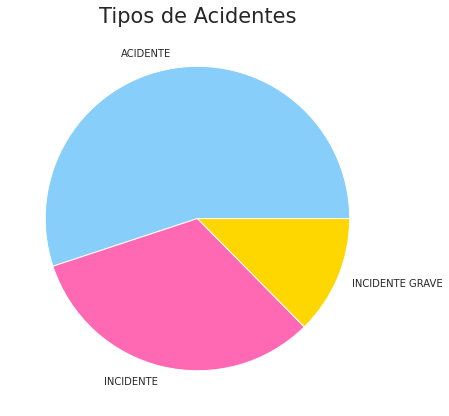

In [13]:
fig = plt.figure(figsize=(7,7))
sns.set_style('ticks')
tipo = dados['tipo'].value_counts()
tipo_num = [tipo[0],tipo[1], tipo[2]]
plt.pie(tipo_num, labels=['ACIDENTE','INCIDENTE', 'INCIDENTE GRAVE'],colors=cores_tipo)
plt.title('Tipos de Acidentes',fontsize=21);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


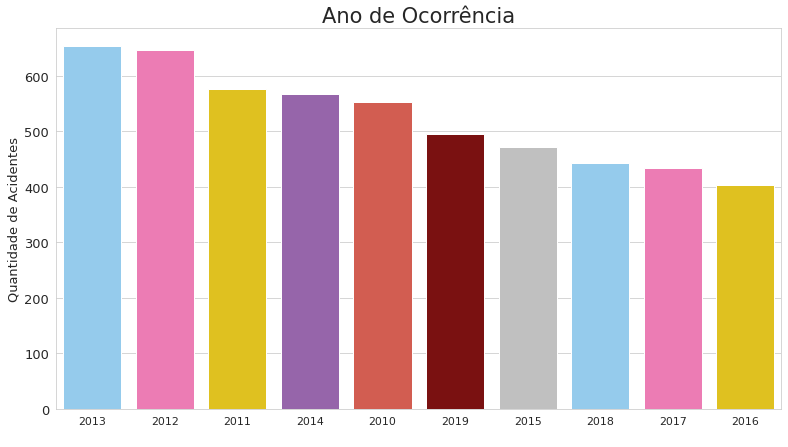

In [20]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13,7))
sns.countplot('ano',order = dados['ano'].value_counts().index,palette=cores_ano,data=dados)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Ano de Ocorrência',fontsize=21)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('Quantidade de Acidentes',fontsize=13)
fig.savefig('ano_ocorrencia.png');

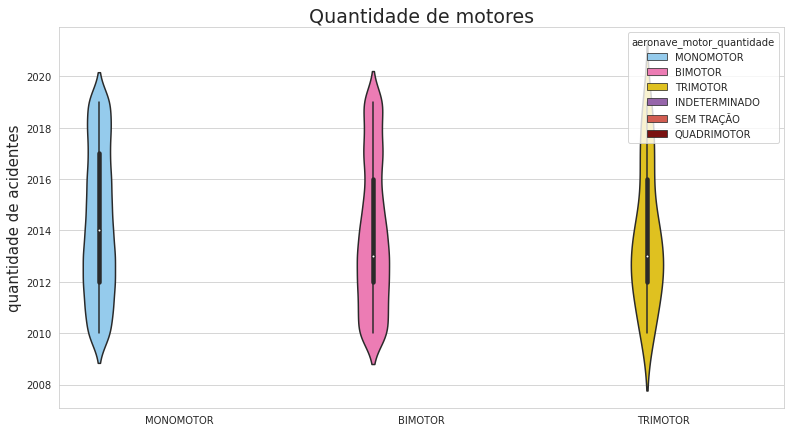

In [24]:
fig = plt.figure(figsize=(13,7))
sns.violinplot(x='aeronave_motor_quantidade',y='ano',hue='aeronave_motor_quantidade',palette=cores_ano,data=dados)
plt.xlim(-0.5,2.5)
plt.title('Quantidade de motores',fontsize=19)
plt.xlabel(' ')
plt.ylabel('quantidade de acidentes',fontsize=15);